In [84]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import hard_sigmoid, sigmoid, softmax
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [85]:
Simbolos =[
    [[1, 0, 0, 0, 0, 0], "A"], # Letra A
    [[1, 1, 0, 0, 0, 0], "B"], # Letra B
    [[1, 0, 0, 1, 0, 0], "C"], # Letra C
    [[1, 0, 1, 1, 0, 0], "D"], # Letra D
    [[1, 0, 1, 1, 1, 0], "E"], # Letra E
    [[1, 1, 0, 1, 0, 0], "F"], # Letra F
    [[1, 1, 1, 1, 0, 0], "G"], # Letra G
    [[1, 1, 1, 1, 1, 0], "H"], # Letra H
    [[0, 1, 1, 0, 1, 0], "I"], # Letra I
    [[0, 1, 1, 1, 1, 0], "J"], # Letra J
    [[1, 0, 0, 0, 0, 1], "K"], # Letra K
    [[1, 1, 0, 0, 0, 1], "L"], # Letra L
    [[1, 0, 0, 1, 0, 1], "M"], # Letra M
    [[1, 0, 1, 1, 0, 1], "N"], # Letra N
    [[1, 0, 1, 1, 1, 1], "O"], # Letra O
    [[1, 1, 0, 1, 0, 1], "P"], # Letra P
    [[1, 1, 1, 1, 0, 1], "Q"], # Letra Q
    [[1, 1, 1, 1, 1, 1], "R"], # Letra R
    [[0, 1, 1, 0, 1, 1], "S"], # Letra S
    [[0, 1, 1, 1, 1, 1], "T"], # Letra T
    [[1, 0, 0, 0, 1, 1], "U"], # Letra U
    [[1, 1, 0, 0, 1, 1], "V"], # Letra V
    [[0, 1, 1, 1, 0, 1], "W"], # Letra W
    [[1, 0, 1, 1, 0, 0], "X"], # Letra X
    [[1, 0, 1, 1, 1, 0], "Y"], # Letra Y
    [[1, 1, 0, 1, 0, 0], "Z"], # Letra Z

    [[0, 0, 1, 1, 1, 0], "Ç"], # Letra Ç
    [[0, 1, 0, 1, 1, 0], "É"], # Letra É
    [[0, 1, 1, 1, 0, 1], "Í"], # Letra Í
    [[0, 1, 0, 1, 1, 1], "Ó"], # Letra Ó
    [[1, 1, 0, 1, 1, 0], "Ú"], # Letra Ú
    [[1, 1, 0, 1, 0, 1], "Á"], # Letra Á
    [[0, 1, 0, 1, 0, 1], "Õ"], # Letra Õ
    [[1, 0, 0, 0, 0, 1], "Â"], # Letra Â
    [[1, 1, 0, 0, 0, 1], "Ê"], # Letra Ê
    [[0, 1, 1, 1, 0, 1], "È"], # Letra È

    [[0, 0, 1, 1, 1, 1], "Num:"], # Representação de número

    [[0, 0, 1, 0, 1, 0], "1"], # Número 1
    [[0, 0, 1, 0, 1, 1], "2"], # Número 2
    [[0, 0, 1, 1, 0, 0], "3"], # Número 3
    [[0, 0, 1, 1, 0, 1], "4"], # Número 4
    [[0, 0, 1, 0, 0, 1], "5"], # Número 5
    [[0, 0, 1, 1, 1, 0], "6"], # Número 6
    [[0, 0, 1, 1, 1, 1], "7"], # Número 7
    [[0, 0, 1, 0, 1, 0], "8"], # Número 8
    [[0, 0, 1, 0, 1, 1], "9"], # Número 9
    [[0, 0, 1, 1, 0, 0], "0"], # Número 0

    [[0, 1, 0, 1, 0, 1], "."], # Ponto final
    [[1, 0, 0, 0, 0, 1], ","], # Vírgula
    [[1, 0, 0, 0, 1, 0], ":"], # Dois pontos
    [[1, 1, 0, 0, 1, 0], "?"], # Ponto de interrogação
    [[0, 0, 1, 0, 0, 0], "!"], # Ponto de exclamação
    [[0, 0, 0, 0, 0, 0], " "], # Espaço

    [[0, 1, 1, 0, 0, 1], "+"], # Sinal de adição
    [[0, 0, 0, 1, 1, 0], "-"], # Sinal de subtração
    [[1, 1, 0, 0, 0, 0], "*"], # Sinal de multiplicação
    [[0, 0, 1, 1, 1, 1], "/"], # Sinal de divisão
    [[0, 1, 0, 1, 0, 0], "="], # Sinal de igualdade
    [[1, 0, 0, 0, 1, 1], ">"], # Sinal de maior que
    [[1, 0, 0, 0, 0, 0], "<"], # Sinal de menor que
    [[1, 1, 1, 0, 0, 0], "≥"], # Sinal de maior ou igual que
    [[0, 0, 0, 0, 1, 1], "≤"], # Sinal de menor ou igual que
    [[1, 1, 1, 0, 1, 0], "≈"]  # Sinal de aproximadamente igual a
]

In [102]:
inputs = np.array([symbol[0] for symbol in Simbolos])
outputs = np.array([symbol[1] for symbol in Simbolos])

label_encoder = LabelEncoder()
outputs = label_encoder.fit_transform(outputs)


In [103]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

In [104]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(inputs.shape[1],)),
    tf.keras.layers.Dense(len(set(outputs)), activation='softmax')
])

In [105]:
inputs = inputs.tolist()
outputs = outputs.tolist()

In [106]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(inputs, outputs, epochs=1000, batch_size=8)

Epoch 1/1000
8/8 [==============================] - 1s 3ms/step - loss: 4.1872 - accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.1478 - accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.1185 - accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.0918 - accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.0642 - accuracy: 0.0159
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.0378 - accuracy: 0.0317
Epoch 7/1000
8/8 [==============================] - 0s 2ms/step - loss: 4.0113 - accuracy: 0.0317
Epoch 8/1000
8/8 [==============================] - 0s 2ms/step - loss: 3.9827 - accuracy: 0.1111
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.9542 - accuracy: 0.1429
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.9248 - accuracy: 0.1429
Epo

In [107]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

1/1 [==============================] - 0s 206ms/step - loss: 0.3895 - accuracy: 0.6923
Test loss: 0.3894639313220978
Test accuracy: 0.692307710647583


# 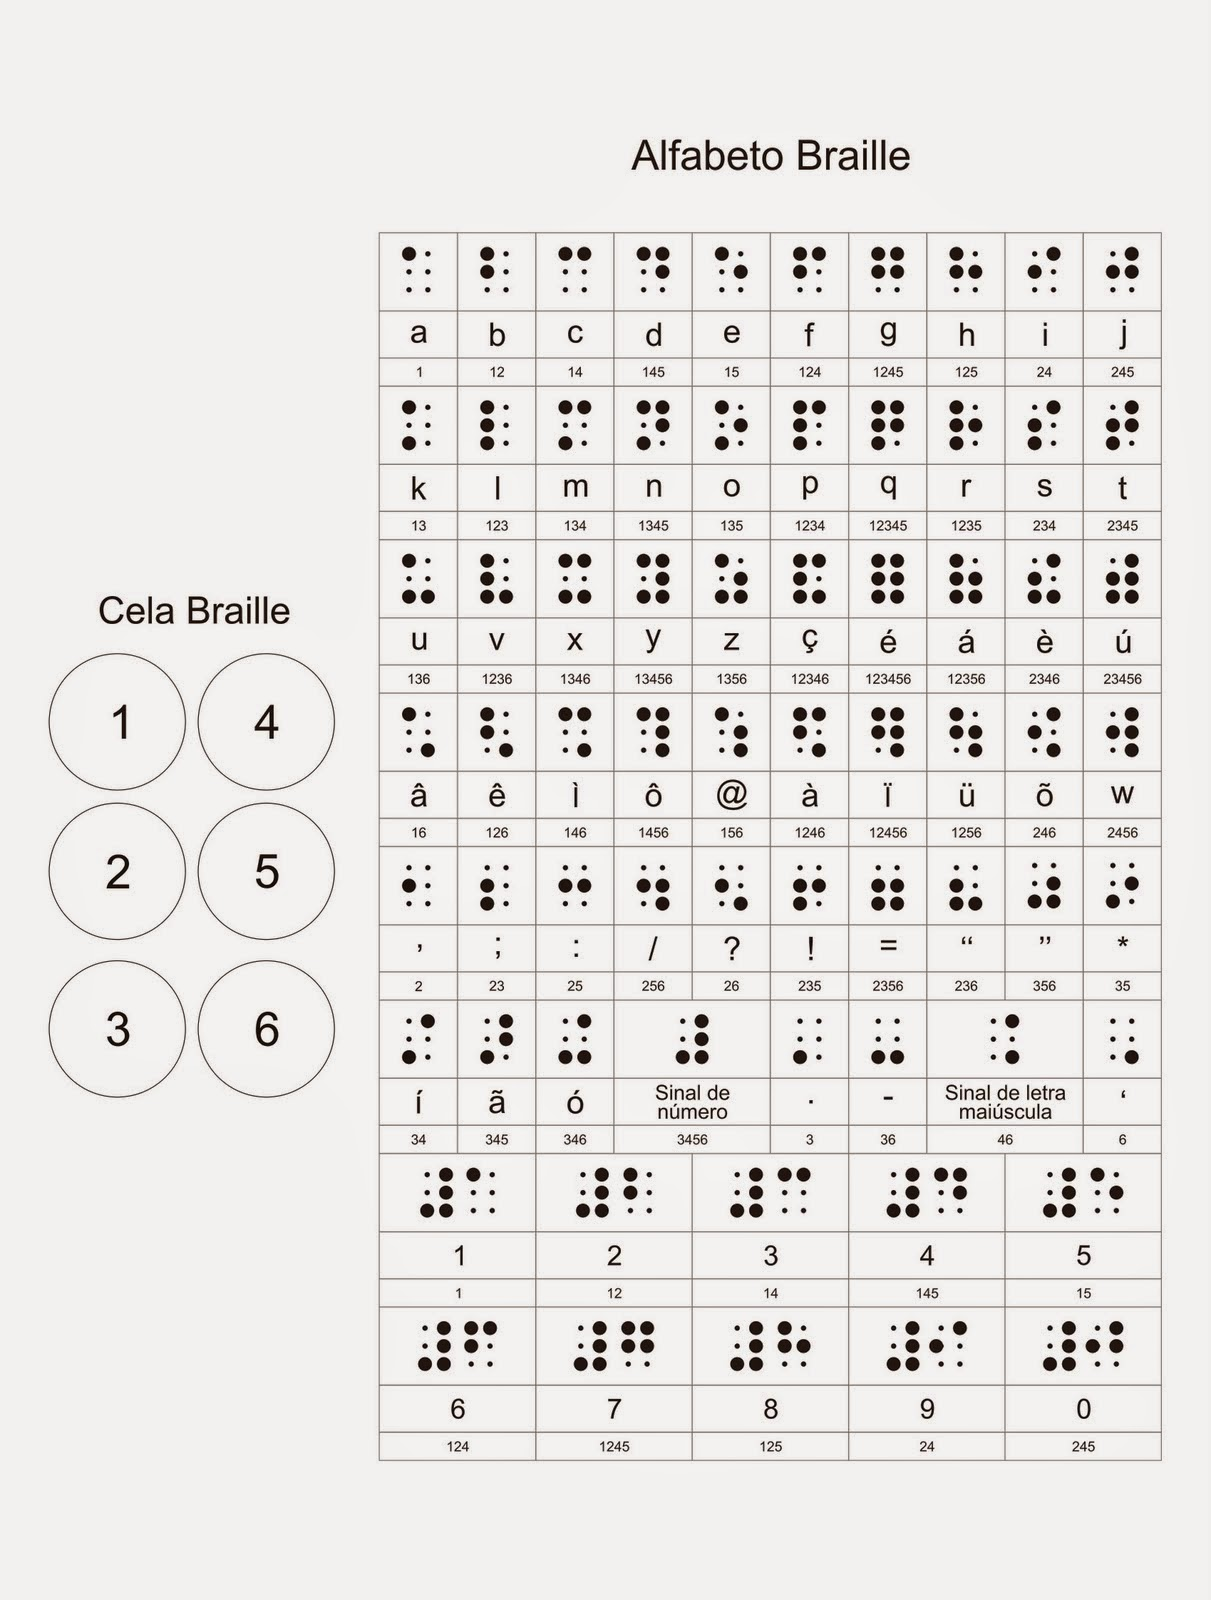